# Market Positioning of Mobile

### Abstract:
There is a new mobile company and the CEO wants to give a tough fight to big companies like Apple, Samsung etc. He has no idea of how to estimate the price of mobiles his company creates. A simple assumption of the prices will not be profitable in this competitive world. To solve this problem he collects sales data of mobile phones of various companies. Thus, the CEO has hired you to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory etc) and its selling price
### Problem Statement:
Predict a price range, indicating how high the price is, using K-Nearest Neighbors algorithm.

### Data Definition
battery_power: Total energy a battery can store in one time measured in mAh

clock_speed: Speed at which microprocessor executes instructions

fc: Front Camera mega pixels

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).



### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
df=pd.read_csv('Mobile_data.csv')
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


### Data Analysis and Preparation
	
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:
1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

### Understanding the dataset

In [3]:
df1=df.copy()
df1.shape

(2000, 15)

In [4]:
df1.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

### Checking for Data Types

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [6]:
df1.dtypes.value_counts()

int64      13
float64     2
dtype: int64

<b> 1. For getting the statistical summary of numerical variables we use the describe()

In [7]:
df1.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

- We can see that the battery_power ranges from 501 to 1998, with mean 1238.5185

### Checking For Null Values & Duplicates

In [8]:
df1.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [9]:
df1.duplicated().sum()

0

### Univariate Data Analysis

In [10]:
for column in df1.columns:
     print("\n" + column)
     print(df1[column].value_counts())   


battery_power
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64

clock_speed
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

fc
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

int_memory
27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

m_dep
0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    10

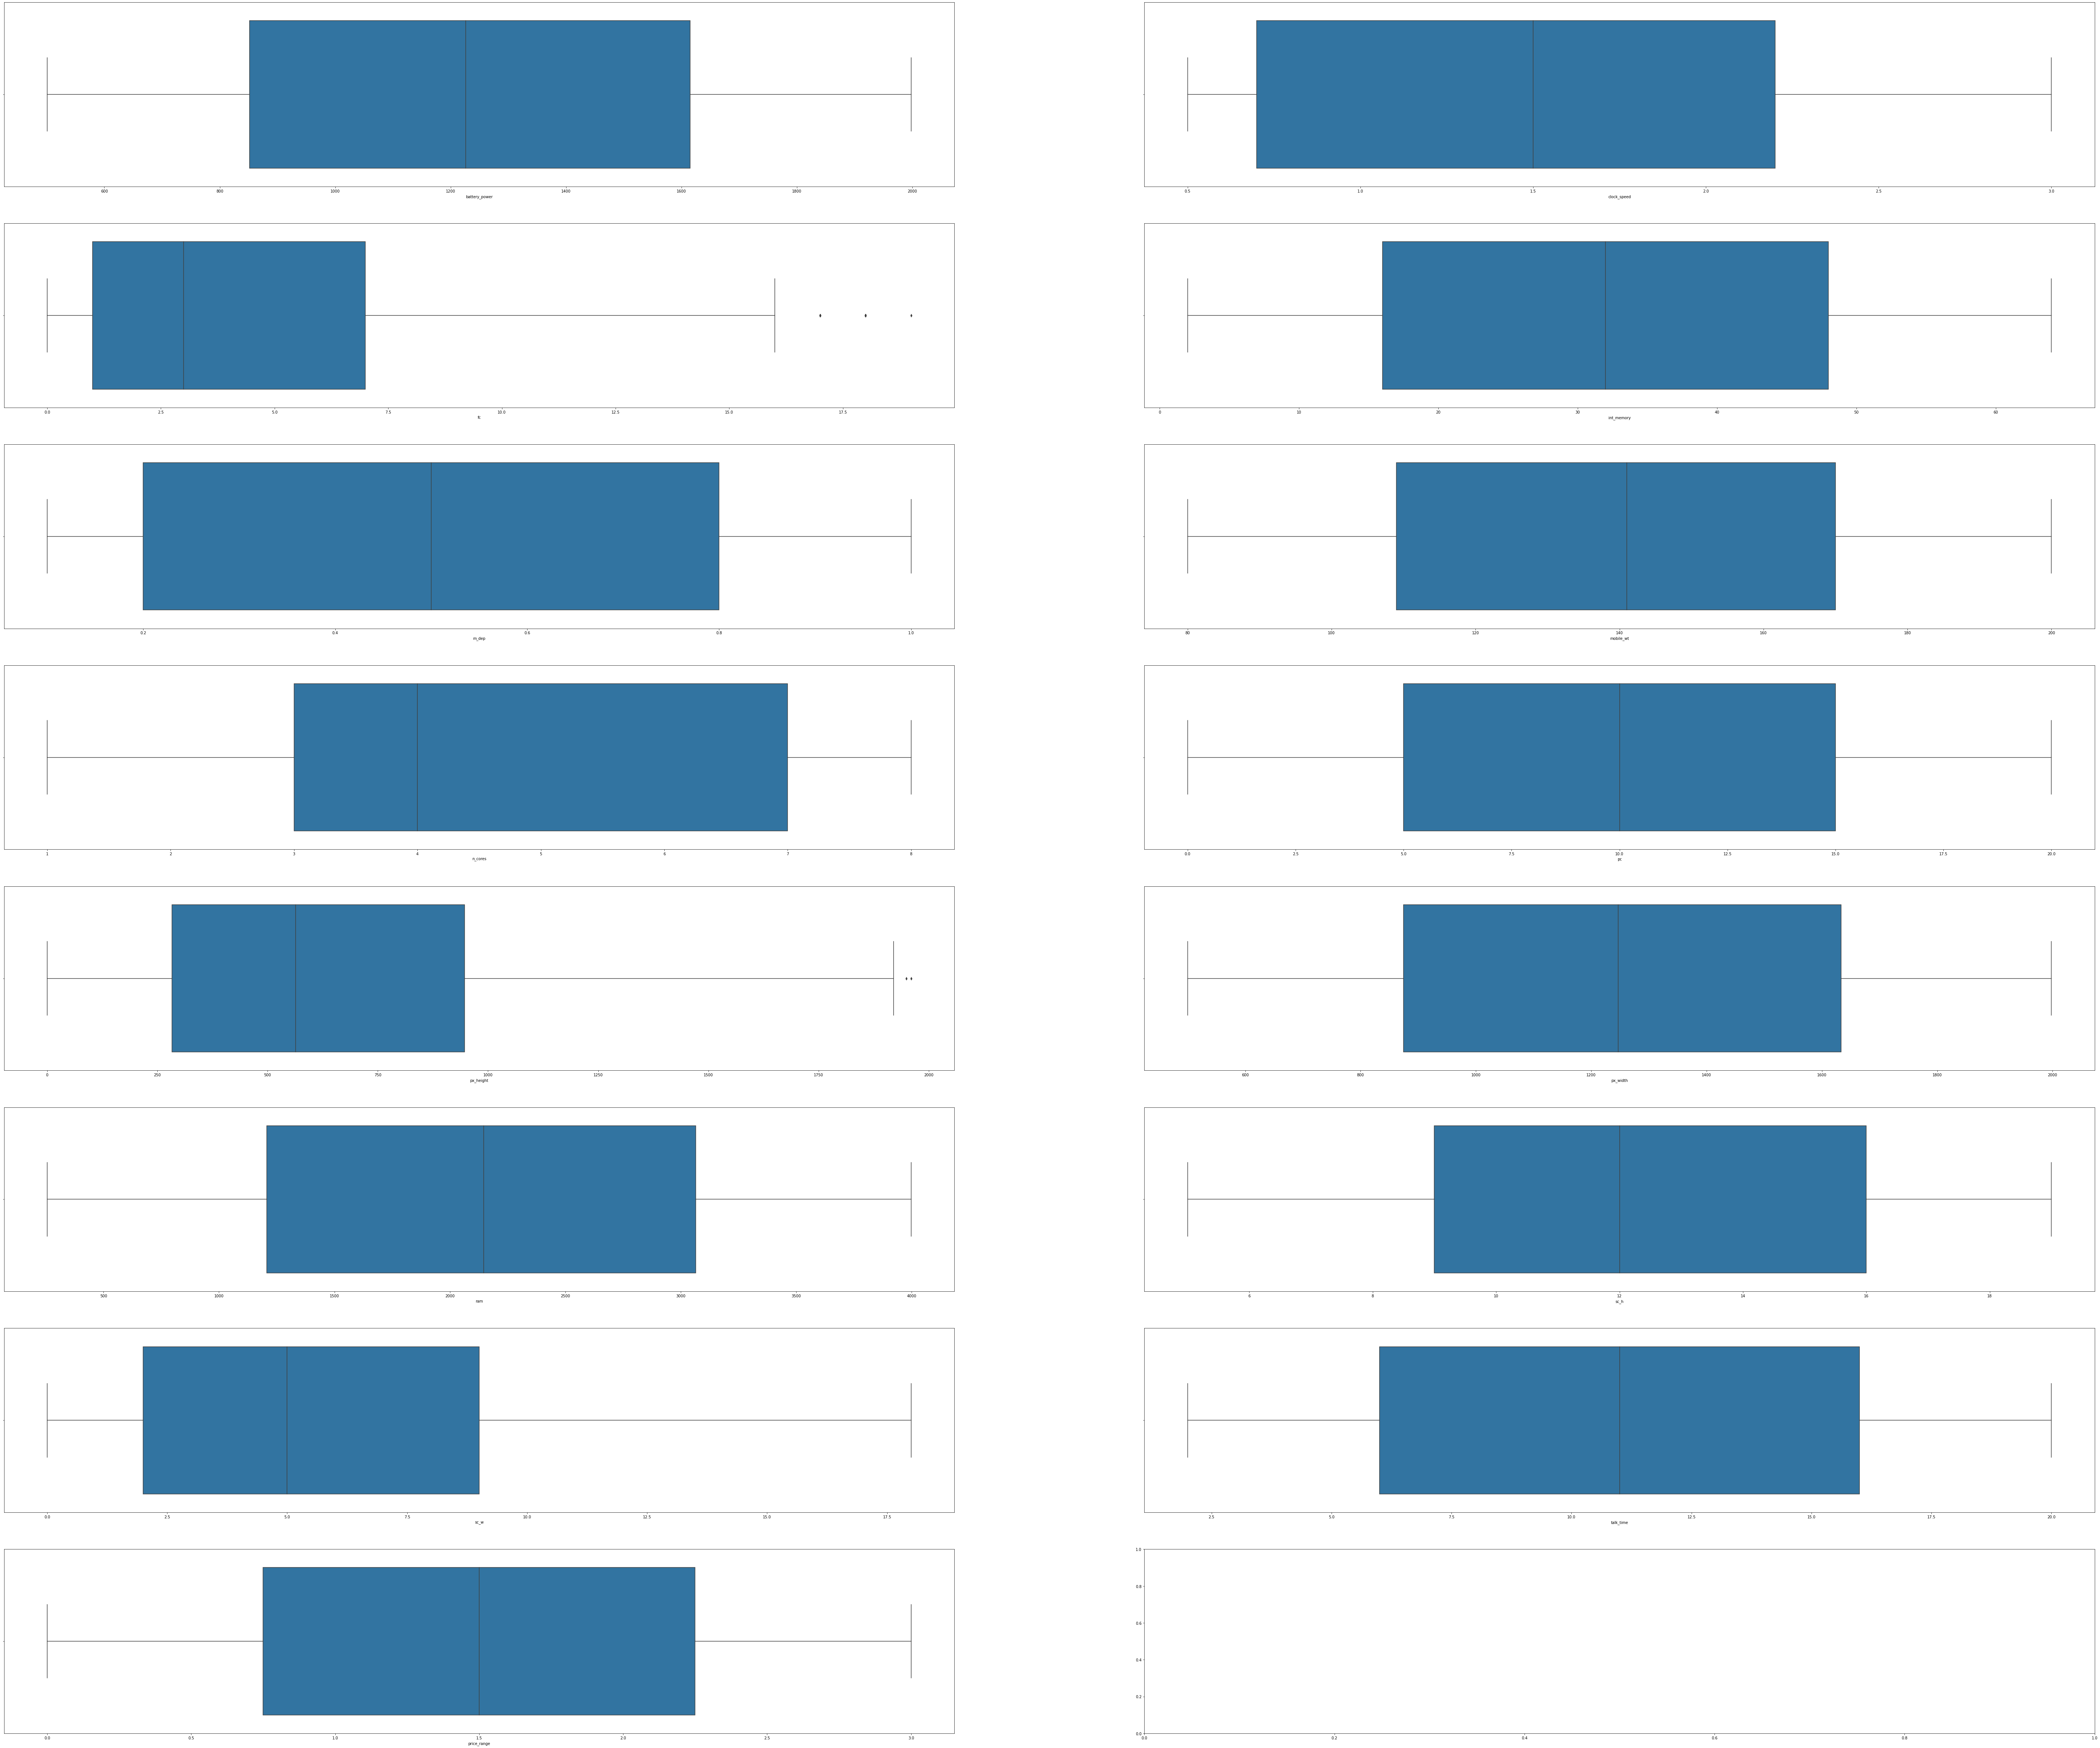

In [11]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize = (100, 85))

# plot the count plot using boxplot() for each numerical variable
for variable, subplot in zip(df1, ax.flatten()):
    sns.boxplot(df1[variable], ax = subplot)

- only 1 column has outlier

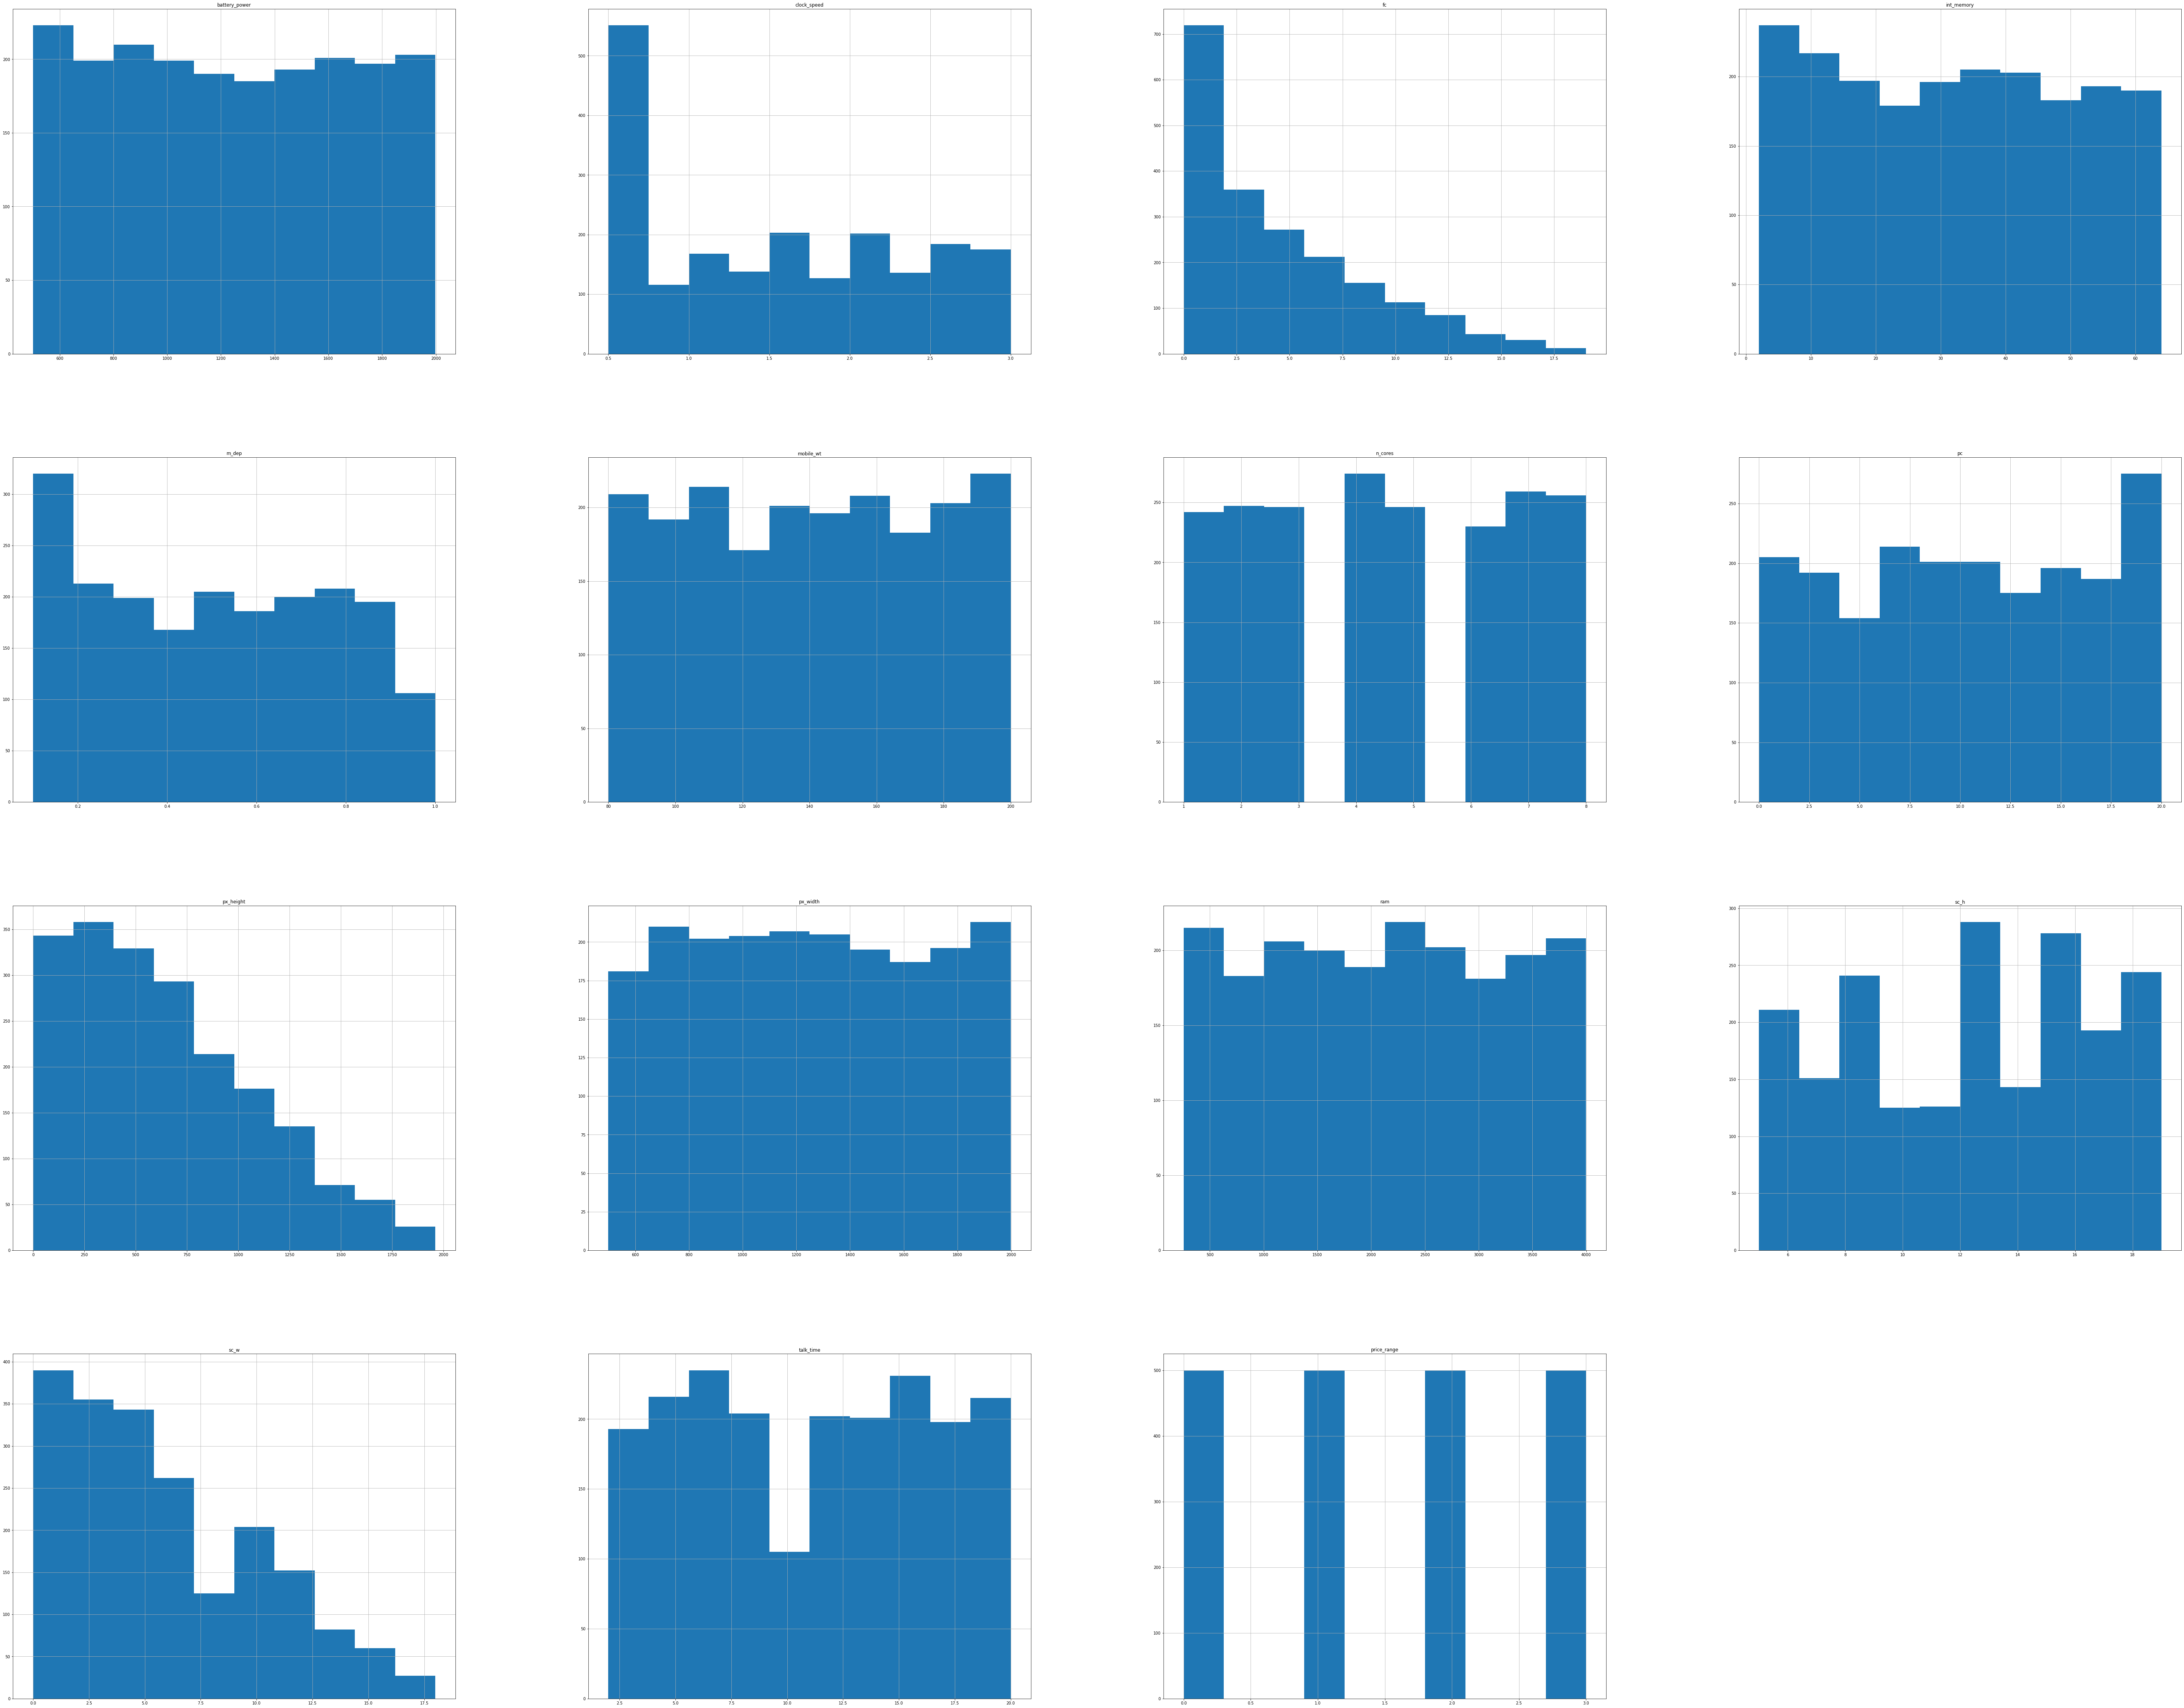

In [12]:
a=df1.hist(figsize=(100,80))

### Bivariate Data Analysis

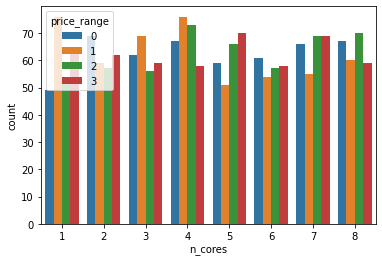

In [13]:
sns.countplot(x=df1['n_cores'],hue=df1['price_range'])
plt.show()

### Understanding Target Variable

In [14]:
df1['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<AxesSubplot:xlabel='price_range', ylabel='count'>

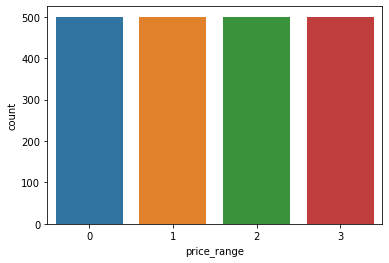

In [15]:
sns.countplot(x=df1['price_range'])

### Analysing Further

In [16]:
df1.groupby(['price_range']).agg({'ram':['min','max','sum','mean','count','median'],
                                'clock_speed':['min','max','sum','mean','count','median']})

ram                                        clock_speed       \
              min   max      sum      mean count  median         min  max   
price_range                                                                 
0             256  1974   392657   785.314   500   719.5         0.5  3.0   
1             387  2811   839745  1679.490   500  1686.5         0.5  3.0   
2            1185  3916  1291408  2582.816   500  2577.0         0.5  3.0   
3            2259  3998  1724616  3449.232   500  3509.5         0.5  3.0   

                                         
               sum    mean count median  
price_range                              
0            775.1  1.5502   500   1.55  
1            744.3  1.4886   500   1.50  
2            764.9  1.5298   500   1.50  
3            760.2  1.5204   500   1.50

In [17]:
df1.groupby(['price_range']).agg({'battery_power':['min','max','sum','mean','count','median'],
                                'int_memory':['min','max','sum','mean','count','median']})

battery_power                                       int_memory  \
                      min   max     sum      mean count  median        min   
price_range                                                                  
0                     503  1994  558451  1116.902   500  1066.0          2   
1                     501  1996  614434  1228.868   500  1206.0          2   
2                     501  1998  614160  1228.320   500  1219.5          2   
3                     503  1994  689992  1379.984   500  1449.5          2   

                                             
            max    sum    mean count median  
price_range                                  
0            64  15587  31.174   500   30.0  
1            64  16058  32.116   500   32.0  
2            64  15460  30.920   500   30.0  
3            64  16988  33.976   500   34.5

In [18]:
df1.groupby(['price_range']).agg({'pc':['min','max','sum','mean','count','median'],
                                'fc':['min','max','sum','mean','count','median']})

pc                                 fc                         \
            min max   sum    mean count median min max   sum   mean count   
price_range                                                                 
0             0  20  4787   9.574   500    9.5   0  19  2042  4.084   500   
1             0  20  4962   9.924   500   10.0   0  18  2170  4.340   500   
2             0  20  5009  10.018   500   10.0   0  18  2249  4.498   500   
3             0  20  5075  10.150   500   10.0   0  18  2158  4.316   500   

                    
            median  
price_range         
0              3.0  
1              3.0  
2              3.0  
3              3.0

### Correlation

In [19]:
corr=df1.corr()
corr

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.200723
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.006606
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.021998
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,0.044435
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,0.000853
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,-0.030302
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,0.004399
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,0.033599
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645,0.148858
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720,0.165818


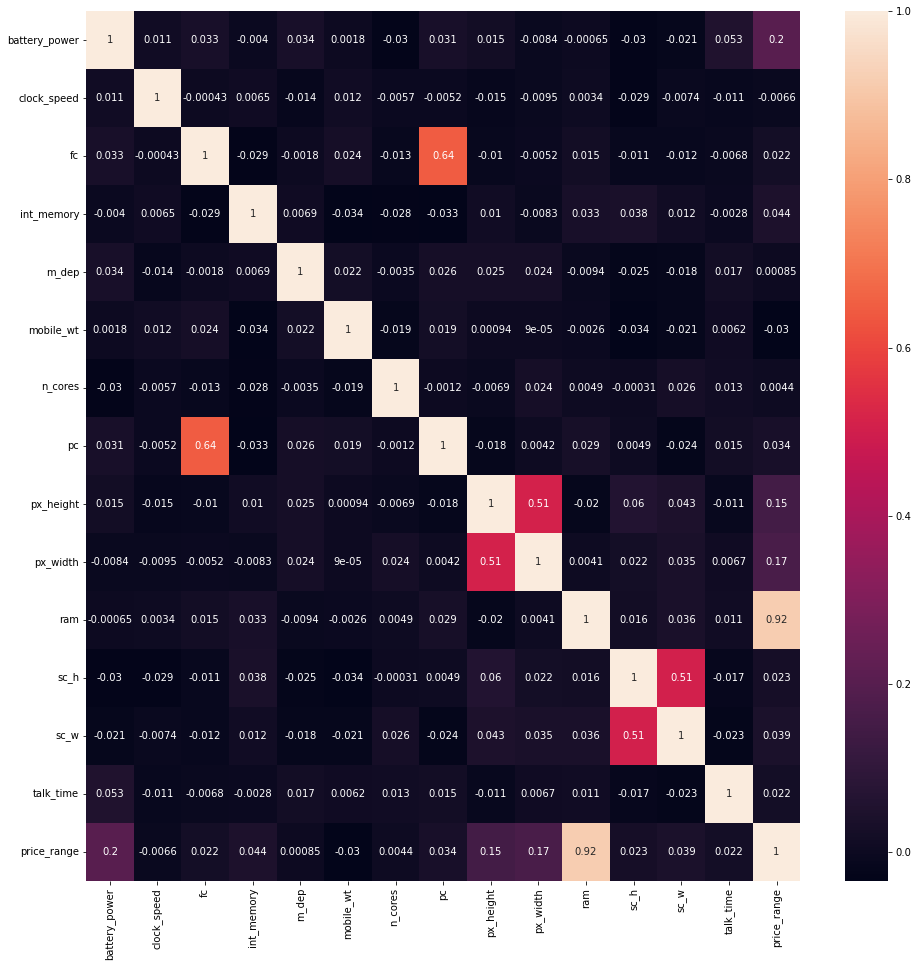

In [20]:
plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True)
plt.show()

- No high correlation

### Outliers Treatment

In [21]:
df1.describe(percentiles=[0.98,0.02,0.03,0.05,0.99,0.97]).T

,count,mean,std,min,2%,3%,5%,50%,97%,98%,99%,max
battery_power,2000.0,1238.51850,439.418206,501.0,524.96,538.97,570.95,1226.0,1961.06,1974.00,1987.00,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.50,0.50,0.50,1.5,2.90,2.90,3.00,3.0
fc,2000.0,4.30950,4.341444,0.0,0.00,0.00,0.00,3.0,15.00,16.00,16.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,2.00,3.00,5.00,32.0,63.00,63.00,64.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.10,0.10,0.10,0.5,1.00,1.00,1.00,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,82.00,83.00,86.00,141.0,198.00,199.00,199.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,1.00,1.00,1.00,4.0,8.00,8.00,8.00,8.0
pc,2000.0,9.91650,6.064315,0.0,0.00,0.00,0.00,10.0,20.00,20.00,20.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,30.98,45.97,70.95,564.0,1618.03,1698.00,1791.01,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,526.96,542.00,579.85,1247.0,1963.00,1974.00,1987.00,1998.0


In [22]:
def outlier_handling(x):
    x = x.clip(upper = x.quantile(0.98))
    x = x.clip(lower = x.quantile(0.02))
    return x

In [23]:
df1=df1.apply(outlier_handling)

In [24]:
df1.describe(percentiles=[0.02,0.98]).T

,count,mean,std,min,2%,50%,98%,max
battery_power,2000.0,1238.57170,438.490233,524.96,524.9992,1226.0,1974.0000,1974.00
clock_speed,2000.0,1.52085,0.813549,0.50,0.5000,1.5,2.9000,2.90
fc,2000.0,4.29400,4.296020,0.00,0.0000,3.0,16.0000,16.00
int_memory,2000.0,32.03100,18.118807,2.00,2.0000,32.0,63.0000,63.00
m_dep,2000.0,0.50175,0.288416,0.10,0.1000,0.5,1.0000,1.00
mobile_wt,2000.0,140.26700,35.337729,82.00,82.0000,141.0,199.0000,199.00
n_cores,2000.0,4.52050,2.287837,1.00,1.0000,4.0,8.0000,8.00
pc,2000.0,9.91650,6.064315,0.00,0.0000,10.0,20.0000,20.00
px_height,2000.0,643.35360,437.923298,30.98,30.9996,564.0,1698.0000,1698.00
px_width,2000.0,1251.55520,431.307850,526.96,526.9992,1247.0,1974.0000,1974.00


### We will now train models:

In [25]:
x = df1.drop('price_range',axis=1)
y = df1['price_range']
print(x.shape)
print(y.shape)

(2000, 14)
(2000,)


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 14)
(500, 14)
(1500,)
(500,)


## Building KNN models:

### Model-1

In [27]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [29]:
from sklearn.metrics import precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [30]:
m1 = KNeighborsClassifier(n_neighbors=6,p=2)  
m1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [31]:
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.9473333333333334
Testing Score 0.938


In [32]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[0 2 1 3 1 1 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 2 2 0 2 2 2 1 3 1 3 1 0 0 0 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 0 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 2 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 2 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 1 2 2 1 3 0 1 3 2 2 2 1 0 1 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 2 3 1 0 1 0 1 2 3 0 2
 3 2 1 2 0 0 2 1 3 2 0 1 1 1 0 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 1 0 2 3 0 0 2 3 2 1 1 2 1 2 0 3 1 2 0
 0 1 0 1 0 1 0 2 2 3 2 1 1 2 1 0 3 1 0 0 3 0 1 0 1 1 3 3 0 2 0 1 1 3 3 0 2
 0 2 0 0 3 3 0 2 2 1 3 1 2 0 1 3 1 0 3 1 0 0 3 2 3 2 0 2 1 0 1 2 3 1 1 1 0
 1 2 2 1 0 1 3 1 2 0 2 2 

In [33]:
def gen_metrics(y_test,ypred):
    print('Accuracy Score',accuracy_score(y_test,ypred))
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))

In [34]:
gen_metrics(y_test,ypred_m1)

Accuracy Score 0.938
[[129   3   0   0]
 [  6 112   0   0]
 [  0  11 108   1]
 [  0   0  10 120]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.89      0.95      0.92       118
           2       0.92      0.90      0.91       120
           3       0.99      0.92      0.96       130

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [35]:
print('Precision Score',precision_score(y_test,ypred_m1,average='macro'))
print('Recall Score',recall_score(y_test,ypred_m1,average='macro'))

Precision Score 0.9378585547306657
Recall Score 0.937375548180633


### Model-2 with improved Parameters

In [36]:
k,acc = [],[]
neighbors = range(3,49,2)
for i in neighbors:
    m = KNeighborsClassifier(n_neighbors=i)
    k.append(i)
    m.fit(x_train,y_train)
    ypred = m.predict(x_test)
    accuracy = accuracy_score(y_test,ypred)
    acc.append(accuracy)

In [37]:
print(k)
print(acc)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47]
[0.916, 0.932, 0.944, 0.946, 0.938, 0.944, 0.938, 0.938, 0.938, 0.932, 0.94, 0.946, 0.938, 0.932, 0.928, 0.928, 0.938, 0.926, 0.932, 0.926, 0.926, 0.934, 0.922]


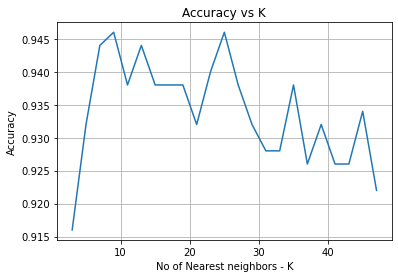

In [38]:
plt.plot(k,acc)
plt.xlabel('No of Nearest neighbors - K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.grid()
plt.show()

#### - Best accuracy we get at 9 and 25

In [39]:
m2 = KNeighborsClassifier(n_neighbors=9,p=2)  
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [40]:
print('Training Score',m2.score(x_train,y_train))
print('Testing Score',m2.score(x_test,y_test))

Training Score 0.9533333333333334
Testing Score 0.946


In [41]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[0 2 1 3 1 1 2 0 3 1 0 0 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 2 2 0 2 2 2 1 3 1 3 1 0 0 0 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 0 3 2 1 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 3 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 2 2 2 1 3 0 2 3 2 2 2 1 0 1 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 2 2 3 1 0 1 0 1 2 3 0 3
 3 2 1 2 0 0 2 1 3 2 0 1 1 1 0 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2 1 2 1 3 1 2 0
 0 1 0 1 0 1 0 2 2 3 2 1 1 2 1 0 3 1 0 0 3 0 1 0 1 1 3 3 0 2 0 1 1 3 3 1 2
 0 2 0 0 3 3 0 2 2 1 3 1 2 0 1 3 1 0 3 1 0 0 3 2 3 2 0 2 1 0 1 2 3 2 1 1 0
 1 2 2 1 1 1 3 1 2 0 2 2 

In [42]:
gen_metrics(y_test,ypred_m2)

Accuracy Score 0.946
[[128   4   0   0]
 [  4 113   1   0]
 [  0  10 109   1]
 [  0   0   7 123]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       132
           1       0.89      0.96      0.92       118
           2       0.93      0.91      0.92       120
           3       0.99      0.95      0.97       130

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



### Building various Supervised Models

In [43]:
def model_efficiency(y_test, y_pred):
    print("Classification report--> \n", classification_report(y_test, y_pred))
    cm =pd.DataFrame(confusion_matrix(y_test, y_pred), index = ["Actual:0", "Actual:1", "Actual:2", "Actual:3"], columns = ["Predicted:0", "Predicted:1","Predicted:2", "Predicted:3"])
    sns.heatmap(cm, annot =True, fmt ="d")
    plt.show()

### Decision Tree

In [44]:
dt = DecisionTreeClassifier(random_state = 45)
dt_model = dt.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
y_pred_prob_dt = dt_model.predict_proba(x_test)[:,1]

Classification report--> 
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       132
           1       0.73      0.80      0.76       118
           2       0.76      0.69      0.72       120
           3       0.87      0.89      0.88       130

    accuracy                           0.82       500
   macro avg       0.82      0.81      0.81       500
weighted avg       0.82      0.82      0.82       500



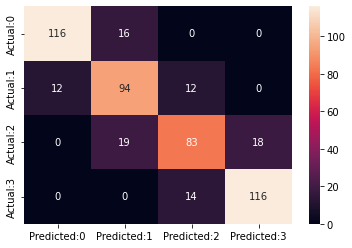

In [45]:
model_efficiency(y_test,y_pred_dt)

### Random Forest

In [46]:
rf = RandomForestClassifier(random_state= 10)
rf_model = rf.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_prob_rf = rf_model.predict_proba(x_test)[:,1]

Classification report--> 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       132
           1       0.83      0.85      0.84       118
           2       0.80      0.81      0.80       120
           3       0.91      0.88      0.90       130

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



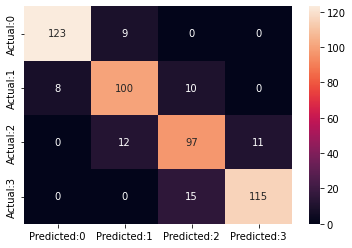

In [47]:
model_efficiency(y_test, y_pred_rf)

### AdaBoost

In [48]:
ada = AdaBoostClassifier(random_state= 10)
ada_model = ada.fit(x_train, y_train)
y_pred_ada = ada_model.predict(x_test)
y_pred_prob_ada = ada_model.predict_proba(x_test)[:,1]

Classification report--> 
               precision    recall  f1-score   support

           0       0.91      0.15      0.26       132
           1       0.41      0.94      0.58       118
           2       0.56      0.60      0.58       120
           3       0.95      0.60      0.74       130

    accuracy                           0.56       500
   macro avg       0.71      0.57      0.54       500
weighted avg       0.72      0.56      0.53       500



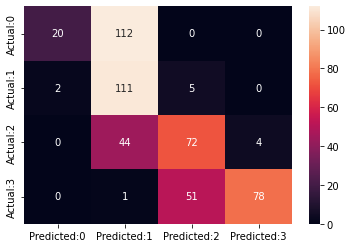

In [49]:
model_efficiency(y_test,y_pred_ada)

### XGBoost

In [50]:
xgb = XGBClassifier(random_state= 25)
xgb_model = xgb.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
y_pred_prob_xgb = xgb_model.predict_proba(x_test)[:,1]

Classification report--> 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       132
           1       0.84      0.92      0.87       118
           2       0.87      0.81      0.84       120
           3       0.92      0.92      0.92       130

    accuracy                           0.90       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.90      0.90      0.90       500



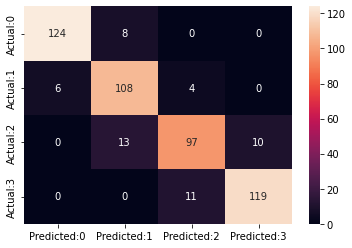

In [51]:
model_efficiency(y_test,y_pred_xgb)

### KNN

In [52]:
knn = KNeighborsClassifier(n_neighbors= 9)
knn_model = knn.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
y_pred_prob_knn = knn_model.predict_proba(x_test)[:,1]

Classification report--> 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       132
           1       0.89      0.96      0.92       118
           2       0.93      0.91      0.92       120
           3       0.99      0.95      0.97       130

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



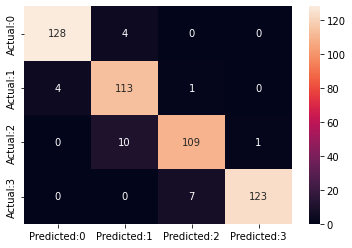

In [53]:
model_efficiency(y_test, y_pred_knn)

### Tabulating Results

In [54]:
pd.DataFrame({"Model Name": ["KNN Classifier", "Decision Tree Classifier","Random Forest Classifier",
                             "AdaBoost Classifier"," XGB Classifier"],
             "Accuracy": [accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_dt),
                          accuracy_score(y_test,y_pred_rf),
                          accuracy_score(y_test,y_pred_ada),accuracy_score(y_test,y_pred_xgb)]})

,Model Name,Accuracy
0,KNN Classifier,0.946
1,Decision Tree Classifier,0.818
2,Random Forest Classifier,0.870
3,AdaBoost Classifier,0.562
4,XGB Classifier,0.896
